<a href="https://colab.research.google.com/github/prachi1101/TASK-1-/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your accident dataset (adjust the path if needed)
df = pd.read_csv('/content/small_traffic_accident_dataset.csv')

# Preview data
print("Shape:", df.shape)
print(df.head())


Shape: (50, 4)
    Time Weather Road_Condition  Severity
0  21:00   Clear            Wet         3
1  06:00    Snow            Wet         3
2  06:00   Clear            Wet         1
3  21:00     Fog            Dry         3
4  12:00     Fog            Dry         3


Dataset Shape: (50, 4)

First 5 Rows:
     Time Weather Road_Condition  Severity
0  21:00   Clear            Wet         3
1  06:00    Snow            Wet         3
2  06:00   Clear            Wet         1
3  21:00     Fog            Dry         3
4  12:00     Fog            Dry         3

Accuracy: 0.4

Confusion Matrix:
 [[3 1 1]
 [1 0 3]
 [3 0 3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.60      0.50         5
           2       0.00      0.00      0.00         4
           3       0.43      0.50      0.46         6

    accuracy                           0.40        15
   macro avg       0.29      0.37      0.32        15
weighted avg       0.31      0.40      0.35        15



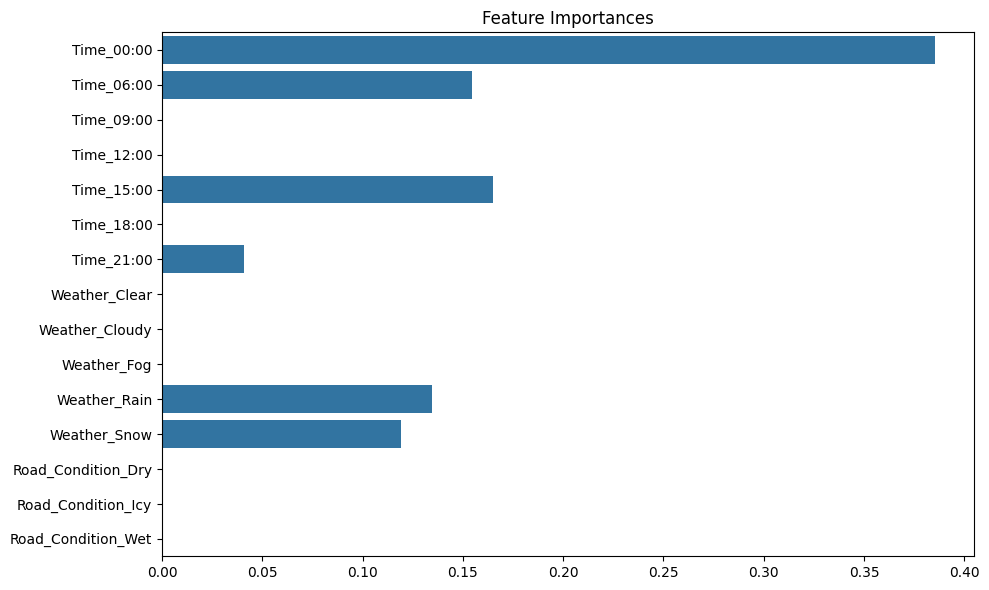

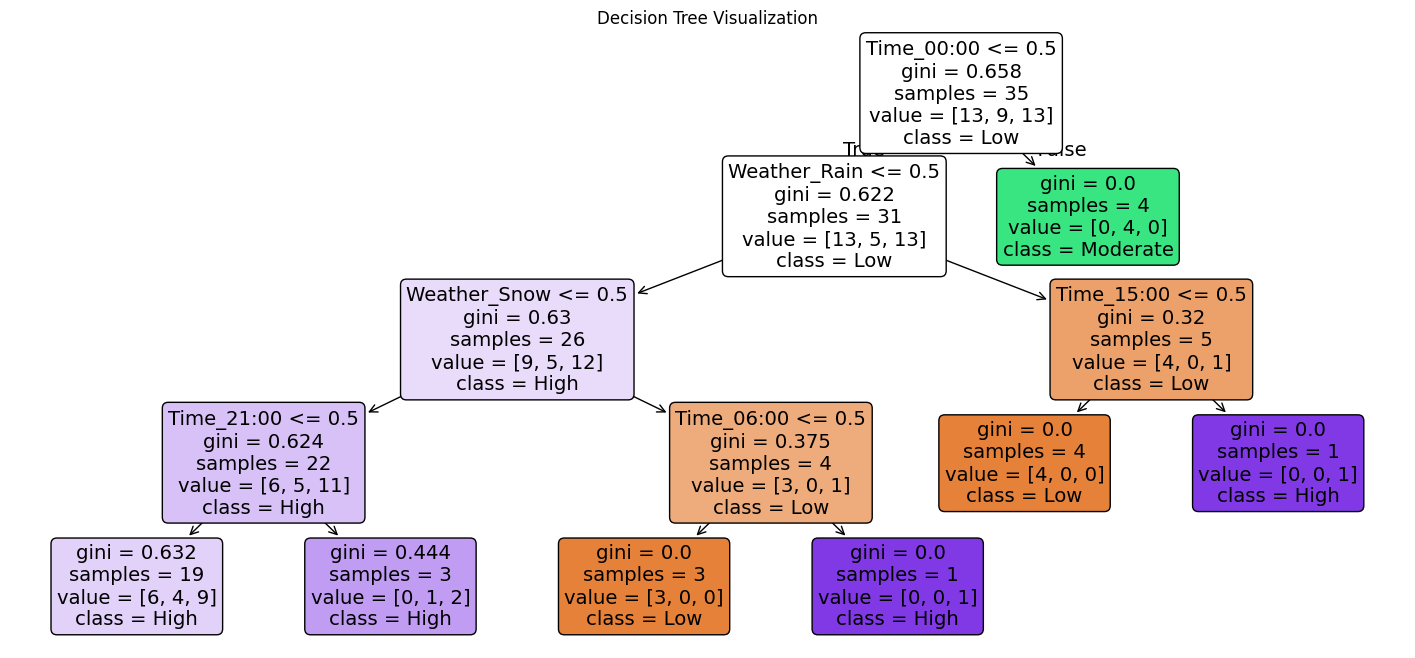

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('small_traffic_accident_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

# Features and Target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Categorical columns
categorical_cols = X.columns.tolist()

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=4, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get feature names after one-hot encoding
encoded_features = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
importances = model.named_steps['classifier'].feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=encoded_features)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# Visualize the decision tree
plt.figure(figsize=(18, 8))
plot_tree(model.named_steps['classifier'],
          feature_names=encoded_features,
          class_names=['Low', 'Moderate', 'High'],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
